In [30]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 加载数据
df = pd.read_csv('housing.csv')

# 分离特征和目标
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 训练模型
model = CatBoostRegressor(
    iterations=800,
    learning_rate=0.1,
    depth=8,
    cat_features=['ocean_proximity'],
    random_seed=42,
    verbose=100,
)

model.fit(X_train, y_train, eval_set=(X_test, y_test))

# 预测和评估
y_pred = model.predict(X_test)
print(f"\nRMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}")
print(f"MAE:  ${mean_absolute_error(y_test, y_pred):,.2f}")
print(f"R²:   {r2_score(y_test, y_pred):.4f}")

0:	learn: 108809.2355278	test: 107855.3019992	best: 107855.3019992 (0)	total: 15.3ms	remaining: 12.3s
100:	learn: 47011.6440956	test: 51317.6218569	best: 51317.6218569 (100)	total: 460ms	remaining: 3.18s
200:	learn: 41361.6800073	test: 48345.8513496	best: 48345.8513496 (200)	total: 888ms	remaining: 2.65s
300:	learn: 37914.0084425	test: 47133.4432575	best: 47130.0623475 (299)	total: 1.29s	remaining: 2.14s
400:	learn: 35247.3444942	test: 46419.9129415	best: 46419.9129415 (400)	total: 1.69s	remaining: 1.68s
500:	learn: 33034.3696379	test: 45960.6814337	best: 45960.6814337 (500)	total: 2.09s	remaining: 1.25s
600:	learn: 31223.1121758	test: 45730.6087935	best: 45715.2460571 (599)	total: 2.51s	remaining: 832ms
700:	learn: 29559.5678103	test: 45650.6829206	best: 45592.3423227 (684)	total: 2.92s	remaining: 413ms
799:	learn: 28167.0167476	test: 45804.6982098	best: 45592.3423227 (684)	total: 3.33s	remaining: 0us

bestTest = 45592.34232
bestIteration = 684

Shrink model to first 685 iterations.



数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

缺失值统计：
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value    

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 108381.3700546	test: 107346.0356415	best: 107346.0356415 (0)	total: 12.9ms	remaining: 12.9s
100:	learn: 45355.6208761	test: 50171.9014769	best: 50171.9014769 (100)	total: 431ms	remaining: 3.84s
200:	learn: 39065.8319738	test: 47223.8424058	best: 47223.8424058 (200)	total: 854ms	remaining: 3.39s
300:	learn: 35467.3729636	test: 46180.7088512	best: 46180.7088512 (300)	total: 1.28s	remaining: 2.97s
400:	learn: 32845.5094582	test: 45911.3165781	best: 45875.6926047 (396)	total: 1.69s	remaining: 2.52s
500:	learn: 30568.7968747	test: 45781.7459543	best: 45739.4769441 (498)	total: 2.13s	remaining: 2.12s
600:	learn: 28696.5338991	test: 45662.3829062	best: 45629.0482224 (561)	total: 2.54s	remaining: 1.69s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 45629.04822
bestIteration = 561

Shrink model to first 562 iterations.

模型评估结果：

训练集表现：
RMSE: $29,541.03
MAE:  $20,624.17
R²:   0.9347

测试集表现：
RMSE: $45,629.05
MAE:  $30,257.49
R²:   0.8411

特征重要性：
                     f

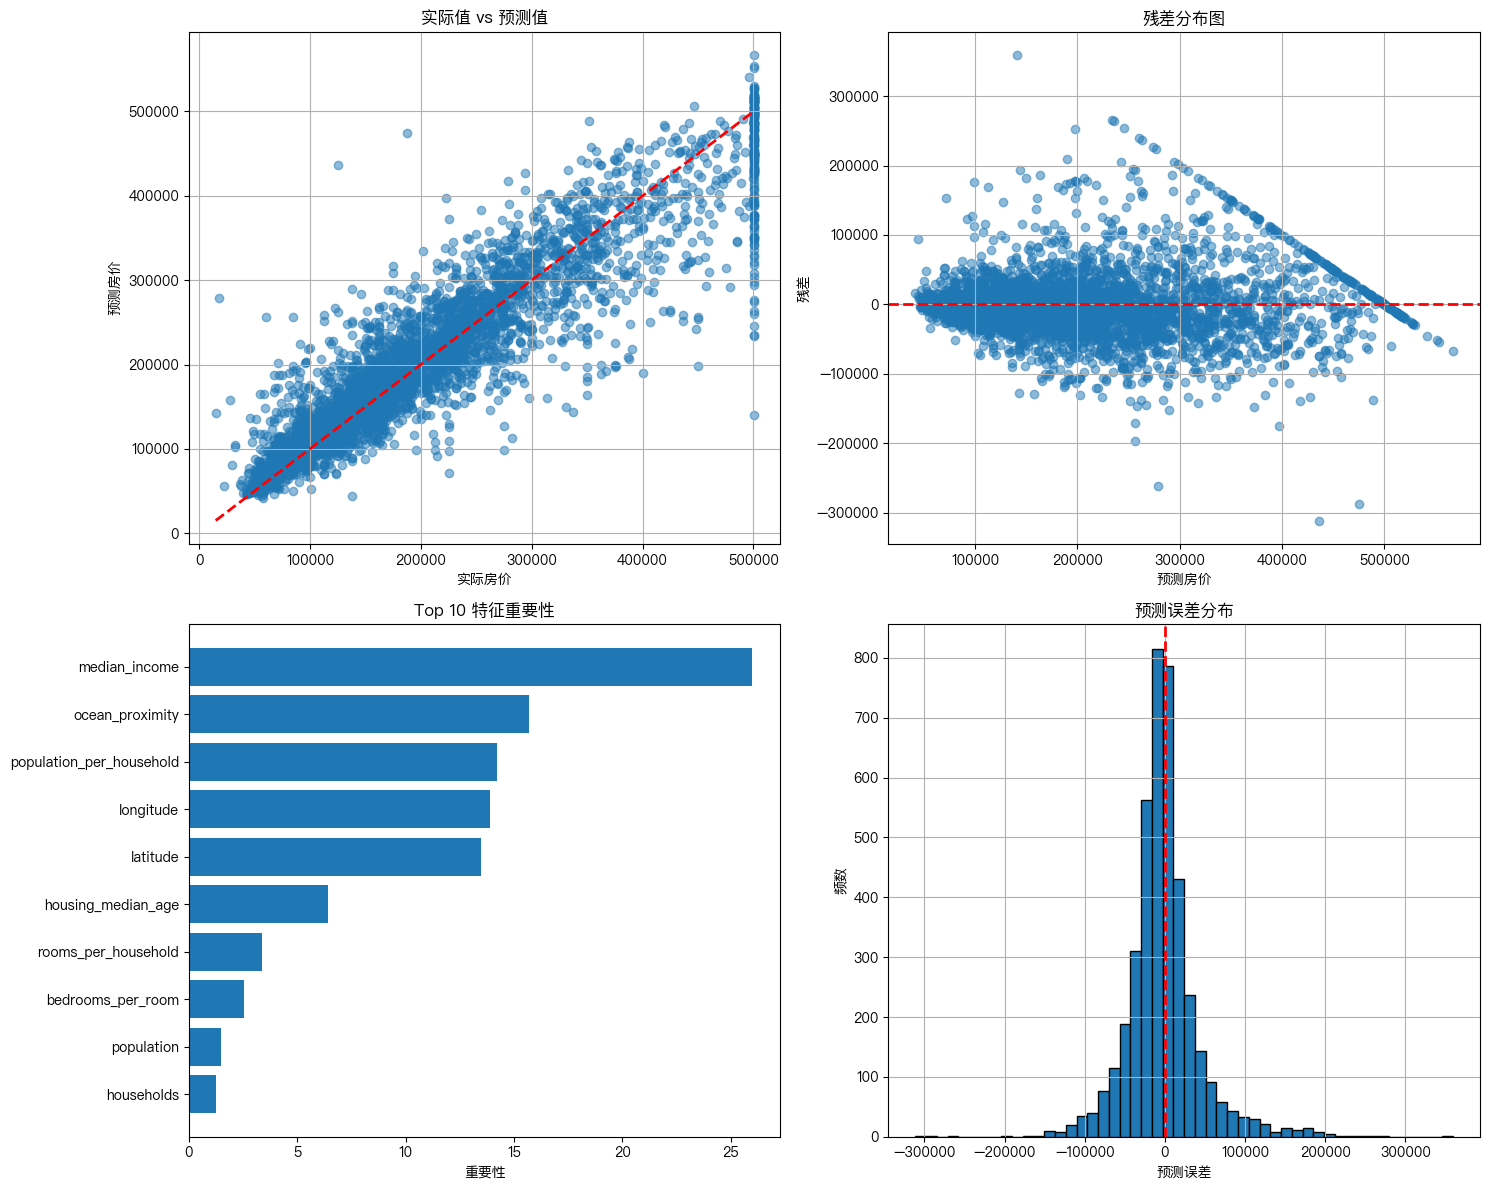


模型已保存为: catboost_housing_model.cbm

示例预测：

样本 1:
  位置: (-119.01, 36.06)
  收入中位数: $1.68万
  实际房价: $47,700
  预测房价: $107,956
  误差: $60,256

样本 2:
  位置: (-119.46, 35.14)
  收入中位数: $2.53万
  实际房价: $45,800
  预测房价: $136,285
  误差: $90,485

样本 3:
  位置: (-122.44, 37.80)
  收入中位数: $3.48万
  实际房价: $500,001
  预测房价: $461,618
  误差: $38,383

样本 4:
  位置: (-118.72, 34.28)
  收入中位数: $5.74万
  实际房价: $218,600
  预测房价: $270,545
  误差: $51,945

样本 5:
  位置: (-121.93, 36.62)
  收入中位数: $3.73万
  实际房价: $278,000
  预测房价: $336,311
  误差: $58,311


In [25]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = "PingFang HK"


# 1. 加载数据
df = pd.read_csv('housing.csv')

# 2. 数据预处理
print("数据基本信息：")
print(df.info())
print("\n缺失值统计：")
print(df.isnull().sum())

# 3. 特征工程（可选）
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# 4. 分离特征和目标
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# 5. 识别分类特征
cat_features = ['ocean_proximity']

# 6. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")

# 7. 创建 CatBoost 模型

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,        
    depth=8,                   
    cat_features=['ocean_proximity'],
    random_seed=42,
    verbose=100,
    early_stopping_rounds=50,
)

# 8. 训练模型
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    plot=True,
)

# 9. 预测
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 10. 评估模型（使用 np.sqrt 计算 RMSE）
print("\n" + "="*50)
print("模型评估结果：")
print("="*50)

print("\n训练集表现：")
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE: ${rmse_train:,.2f}")
print(f"MAE:  ${mean_absolute_error(y_train, y_pred_train):,.2f}")
print(f"R²:   {r2_score(y_train, y_pred_train):.4f}")

print("\n测试集表现：")
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: ${rmse_test:,.2f}")
print(f"MAE:  ${mean_absolute_error(y_test, y_pred_test):,.2f}")
print(f"R²:   {r2_score(y_test, y_pred_test):.4f}")

# 11. 特征重要性
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n特征重要性：")
print(feature_importance)

# 12. 可视化
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 12.1 实际值 vs 预测值
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('实际房价')
axes[0, 0].set_ylabel('预测房价')
axes[0, 0].set_title('实际值 vs 预测值')
axes[0, 0].grid(True)

# 12.2 残差图
residuals = y_test - y_pred_test
axes[0, 1].scatter(y_pred_test, residuals, alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('预测房价')
axes[0, 1].set_ylabel('残差')
axes[0, 1].set_title('残差分布图')
axes[0, 1].grid(True)

# 12.3 特征重要性图
top_features = feature_importance.head(10)
axes[1, 0].barh(range(len(top_features)), top_features['importance'])
axes[1, 0].set_yticks(range(len(top_features)))
axes[1, 0].set_yticklabels(top_features['feature'])
axes[1, 0].set_xlabel('重要性')
axes[1, 0].set_title('Top 10 特征重要性')
axes[1, 0].invert_yaxis()

# 12.4 预测误差分布
axes[1, 1].hist(residuals, bins=50, edgecolor='black')
axes[1, 1].set_xlabel('预测误差')
axes[1, 1].set_ylabel('频数')
axes[1, 1].set_title('预测误差分布')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].grid(True)

plt.tight_layout()
# plt.savefig('catboost_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 13. 保存模型
model.save_model('catboost_housing_model.cbm')
print("\n模型已保存为: catboost_housing_model.cbm")

# 14. 示例预测
print("\n" + "="*50)
print("示例预测：")
print("="*50)
sample = X_test.iloc[:5]
predictions = model.predict(sample)
actual_values = y_test.iloc[:5].values

for i, (idx, row) in enumerate(sample.iterrows()):
    print(f"\n样本 {i+1}:")
    print(f"  位置: ({row['longitude']:.2f}, {row['latitude']:.2f})")
    print(f"  收入中位数: ${row['median_income']:.2f}万")
    print(f"  实际房价: ${actual_values[i]:,.0f}")
    print(f"  预测房价: ${predictions[i]:,.0f}")
    print(f"  误差: ${abs(actual_values[i] - predictions[i]):,.0f}")

In [28]:
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.05, 0.1, 0.12],
    'iterations': [500, 1000, 1200]
}

# 创建模型
model_tuning = CatBoostRegressor(
    cat_features=cat_features,
    random_seed=42,
    verbose=100,
)


# 网格搜索
grid_search = GridSearchCV(
    model_tuning, 
    param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("最佳参数：", grid_search.best_params_)
print("最佳得分：", np.sqrt(-grid_search.best_score_))

# 使用最佳模型
best_model = grid_search.best_estimator_

0:	learn: 108381.3700546	total: 9.81ms	remaining: 11.8s
100:	learn: 45355.6208761	total: 454ms	remaining: 4.94s
200:	learn: 39065.8319738	total: 842ms	remaining: 4.19s
300:	learn: 35467.3729636	total: 1.24s	remaining: 3.71s
400:	learn: 32845.5094582	total: 1.67s	remaining: 3.33s
500:	learn: 30568.7968747	total: 2.08s	remaining: 2.9s
600:	learn: 28696.5338991	total: 2.46s	remaining: 2.46s
700:	learn: 27042.0294712	total: 2.89s	remaining: 2.06s
800:	learn: 25616.7804813	total: 3.32s	remaining: 1.65s
900:	learn: 24368.7067769	total: 3.77s	remaining: 1.25s
1000:	learn: 23210.0173385	total: 4.23s	remaining: 841ms
1100:	learn: 22132.5551451	total: 4.62s	remaining: 416ms
1199:	learn: 21112.4731934	total: 5.05s	remaining: 0us
最佳参数： {'depth': 8, 'iterations': 1200, 'learning_rate': 0.1}
最佳得分： 44308.19861473952
